<a href="https://colab.research.google.com/github/xpertdesh/ml-class21/blob/main/projects/crate%26barrel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crate and Barrel Project

This is a multiple classification problem and the challenge is to classify products into correct categories.

Before looking at the data set, from the description provided in Kaggle, I understand that there are 93 numerical features, and there are 9 labels.
<br><br><br>

## Ok let's get started!
<br>

# 1. Import Neccessary Libraries

In [27]:
#data analysis libraries 
import numpy as np
import pandas as pd

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV



#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

<br><br><br>
## 2. Read in and Explore the Data

The overviews of data

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/xpertdesh/ml-class21/main/notes/train.csv?token=AKRT3VY2L3DEVKJQRII7NITANOUC4')
test = pd.read_csv('https://raw.githubusercontent.com/xpertdesh/ml-class21/main/notes/test.csv?token=AKRT3V3F2E527DTHGBQVRVLANOUFI')
sample_submission = pd.read_csv('https://raw.githubusercontent.com/xpertdesh/ml-class21/main/notes/sampleSubmission.csv?token=AKRT3V7LSQDV62FSSXU4KB3ANOUH6')

In [3]:
train.describe(include='all')

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Class_2
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16122
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,0.263906,1.252869,0.140874,0.480979,1.696693,1.284398,1.413459,0.366108,0.575423,0.551699,0.471525,0.204014,0.729969,0.142522,2.643880,1.534520,0.563108,0.696613,0.238970,0.275768,0.150312,0.148680,1.043796,0.696516,0.946411,0.666263,0.709089,0.263632,0.582129,0.485585,...,0.323120,0.303775,0.309108,0.697970,0.388603,1.029930,0.239746,1.187563,0.168590,1.256796,0.222228,0.571706,2.897653,0.392902,0.811128,0.892789,0.319290,0.858722,0.591050,0.579851,0.726817,0.748457,0.124196,0.366415,0.300446,0.698067,0.078461,0.187983,0.496719,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135,NaN
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,1.083340,3.042333,0.567089,2.014697,3.163212,3.862236,2.226163,1.477436,1.335985,4.636145,1.438727,0.696050,1.446220,0.782979,4.629015,2.332994,1.710305,2.873222,0.828112,1.901294,1.640880,0.897354,2.416849,1.310202,3.368622,3.197965,2.555119,0.756934,1.602579,3.298315,...,0.998743,1.925806,1.082148,3.983722,2.577693,3.028469,1.017553,2.666742,0.946158,3.402080,0.783052,1.361874,4.974322,1.761054,4.111091,1.941368,1.162443,2.411646,5.783233,3.757822,3.200095,2.920038,0.906621,2.778317,1.285569,2.245671,0.46

In [4]:
# checking for null values
missing = train.isnull().sum()
missing.sum()

0

In [5]:
train.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,...,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,...,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,Class_1


In [6]:
test.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,...,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,3,2,1,0,0,0,0,0,0,0,5,3,1,1,0,0,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,2,0,4,0,4,0,0,0,0,2,0,0,0,8,0,0,0,0,...,24,0,0,0,0,0,0,0,0,0,6,8,0,0,0,0,0,0,0,0,0,0,0,2,0,0,4,0,2,0,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,0,7,1,0,0,0,7,0,2,0,0,0,4,0,0,0,1,1,2,0,0,0,0,0,0,1,0,0,2,0,...,10,1,0,2,0,0,1,6,1,1,0,0,1,1,1,2,0,0,2,0,0,0,0,0,0,0,6,0,2,0,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,21,3,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,2,0,0,0,0,1,0,...,2,0,0,0,0,0,0,0,9,0,0,2,0,0,0,0,6,0,8,0,0,0,0,1,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,4,0,5,16,0,0,0,0,0,0,1,0,0,0,0,0,0,0,9,0,0


In [7]:
print("train shape: ", train.shape, " test.shape: ", test.shape)

train shape:  (61878, 95)  test.shape:  (144368, 94)


**Some observations:**

*   We notice that the train dataset has almost 50% less instances than the test dataset
*   The test data is missing a column which is the target, and the goal of this project
*   Aside from that, all the data is complete with no missing values
*   Only the `'id'` column will get dropped
<br><br><br>

## 3. Data Visualization

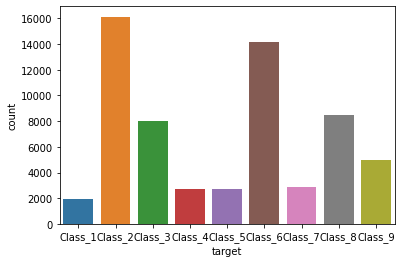

In [8]:
sns.countplot(train.target)

In [9]:
train['target'].value_counts(normalize=True) * 100

Class_2    26.054494
Class_6    22.843337
Class_8    13.678529
Class_3    12.935130
Class_9     8.007693
Class_7     4.588060
Class_5     4.426452
Class_4     4.348880
Class_1     3.117425
Name: target, dtype: float64

Just to get an idea, classes 2, 6, 8, 3 cover roughly 75% of the labels.
<br><br><br>

## 4. Prepare the dataset for training

*   Drop uneccessary data
*   Split up the data 80/20

In [10]:
X = train.drop(['id', 'target'], axis=1)
y = train['target']
test = test.drop(['id'], axis=1)

print(X.shape, y.shape, test.shape)

(61878, 93) (61878,) (144368, 93)


In [11]:
# keeping 20% dataset for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(49502, 93) (49502,) (12376, 93) (12376,)


<br><br><br>
## 5. Testing out models in default state

* Decision Tree
* Bagging classifier
* Pasting classifier
* Random Subspaces
* Random Patches
* XGBoost
<br><br><br>

In [12]:
# Decision Tree
tree_clf = tree.DecisionTreeClassifier(criterion='entropy')
tree_clf.fit(X_train, y_train)
predictions = tree_clf.predict(X_test)
accuracy_score(y_test, predictions)

0.7110536522301228

In [13]:
# Bagging classifier
clf = tree.DecisionTreeClassifier(criterion='entropy')
bagging_clf = BaggingClassifier(clf, n_estimators=100, max_samples=1.0,
                                bootstrap=True, n_jobs=-1)
bagging_clf.fit(X_train, y_train)
predictions = bagging_clf.predict(X_test)
accuracy_score(y_test, predictions)

0.8009857789269554

In [14]:
# Pasting classifier
clf = tree.DecisionTreeClassifier(criterion='entropy')
pasting_clf = BaggingClassifier(clf, n_estimators=100, max_samples=1.0,
                                bootstrap=False, n_jobs=-1)
pasting_clf.fit(X_train, y_train)
predictions = pasting_clf.predict(X_test)
accuracy_score(y_test, predictions)

0.71969941822883

In [15]:
# Random subspaces
clf = tree.DecisionTreeClassifier(criterion='entropy')
subspace_clf = BaggingClassifier(clf, n_estimators=100, max_features=0.6, bootstrap=True, n_jobs=-1)
subspace_clf.fit(X_train, y_train)
predictions = subspace_clf.predict(X_test)
accuracy_score(y_test, predictions)

0.8070458952811894

In [16]:
# Random patches
clf = tree.DecisionTreeClassifier(criterion='entropy')
subspace_clf = BaggingClassifier(clf, n_estimators=100, max_features=0.5, 
                                 max_samples=0.9, bootstrap=True, n_jobs=-1)
subspace_clf.fit(X_train, y_train)
predictions = subspace_clf.predict(X_test)
accuracy_score(y_test, predictions)

0.8035714285714286

In [17]:
# XGBoost
params = { "n_estimators": 400, 'tree_method':'gpu_hist', 'predictor':'gpu_predictor' }

model = XGBClassifier(**params)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.7989657401422108

## 6. Tuning and choosing model to submit

In [18]:
# GridSearch Bagging
hyperparam_grid = {
    'max_samples' : [0.2, 0.3, 0.5, 0.6, 0.8, 1.0]
}

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
bagging_clf = BaggingClassifier(clf, n_estimators=100, bootstrap=True, n_jobs=-1)

grid_search = GridSearchCV(bagging_clf, hyperparam_grid, cv=10)
grid_search.fit(X_train, y_train)
predictions = grid_search.best_estimator_.predict(X_test)
accuracy_score(y_test, predictions)

0.5701357466063348

In [19]:
grid_search.best_params_

{'max_samples': 0.2}

In [20]:
# GridSearch Pasting
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
bagging_clf = BaggingClassifier(clf, n_estimators=100, bootstrap=False, n_jobs=-1)

grid_search = GridSearchCV(bagging_clf, hyperparam_grid, cv=10)
grid_search.fit(X_train, y_train)
predictions = grid_search.best_estimator_.predict(X_test)
accuracy_score(y_test, predictions)

0.5660956690368455

In [21]:
grid_search.best_params_

{'max_samples': 0.2}

In [22]:
# GridSearch Random Subspaces
hyperparam_grid = {
    'max_features' : [0.2, 0.3, 0.5, 0.6, 0.8, 1.0]
}

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
bagging_clf = BaggingClassifier(clf, n_estimators=50, bootstrap=True, n_jobs=-1)

grid_search = GridSearchCV(bagging_clf, hyperparam_grid, cv=10)
grid_search.fit(X_train, y_train)
predictions = grid_search.best_estimator_.predict(X_test)
accuracy_score(y_test, predictions)

0.612152553329024

In [23]:
grid_search.best_params_

{'max_features': 0.3}

In [24]:
# GridSearch Random Patches
hyperparam_grid = {
    'max_features' : [0.3, 0.5, 0.6, 0.8],
    'max_samples' : [0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
}

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
bagging_clf = BaggingClassifier(clf, n_estimators=50, bootstrap=True, n_jobs=-1)

grid_search = GridSearchCV(bagging_clf, hyperparam_grid, cv=10)
grid_search.fit(X_train, y_train)
predictions = grid_search.best_estimator_.predict(X_test)
accuracy_score(y_test, predictions)

0.6400290885585003

In [25]:
grid_search.best_params_

{'max_features': 0.3, 'max_samples': 0.8}

In [30]:
# XGBoost
param_grid = [{'n_estimators': [50, 100, 150, 200],
                    'max_depth': [2, 4, 6, 8]}]

param_comb = 5
folds=5
params = {'tree_method': 'gpu_hist', 'predictor': 'gpu_predictor'}
model = XGBClassifier(**params)
model
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=param_comb,  n_jobs=-1, 
                                   cv=skf.split(X_train, y_train), verbose=3)

grid_result = random_search.fit(X_train, y_train)
predictions = random_search.best_estimator_.predict(X_test)
accuracy_score(y_test, predictions)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.1min finished


0.7979153199741436

In [29]:
random_search.best_params_

{'max_depth': 8, 'n_estimators': 50}

<br><br><br>
## 7. Submission

Run XGBoost since it was the best model with the test data. 

In [36]:
params = {'tree_method': 'gpu_hist', 'predictor': 'gpu_predictor'}
model = XGBClassifier(max_depth=8, n_estimators=50, **params)
my_model = CalibratedClassifierCV(model, cv=5, method='isotonic')
my_model.fit(X_train, y_train)
predictions = my_model.predict_proba(test)

output = pd.DataFrame(predictions)
output.index += 1 
output.index.name = 'id'
output.columns=['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9']

In [38]:
output.to_csv('results.csv')

In [39]:
test.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,...,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,0,0,0,0,0,0,0,0,0,3,0,0,0,3,2,1,0,0,0,0,0,0,0,5,3,1,1,0,0,0,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11,1,20,0,0,0,0,0
1,2,2,14,16,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,2,0,4,0,4,0,0,0,0,2,0,0,0,8,0,0,0,0,0,...,24,0,0,0,0,0,0,0,0,0,6,8,0,0,0,0,0,0,0,0,0,0,0,2,0,0,4,0,2,0,0,0,0,0,0,4,0,0,2,0
2,0,1,12,1,0,0,0,0,0,0,7,1,0,0,0,7,0,2,0,0,0,4,0,0,0,1,1,2,0,0,0,0,0,0,1,0,0,2,0,0,...,10,1,0,2,0,0,1,6,1,1,0,0,1,1,1,2,0,0,2,0,0,0,0,0,0,0,6,0,2,0,0,0,0,0,2,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,21,3,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,2,0,0,0,0,1,0,0,...,2,0,0,0,0,0,0,0,9,0,0,2,0,0,0,0,6,0,8,0,0,0,0,1,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,2,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,4,0,5,16,0,0,0,0,0,0,1,0,0,0,0,0,0,0,9,0,0


In [40]:
output.head()

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
id,,,,,,,,,
1,0.000801,0.206215,0.192241,0.593361,0.0000,0.001412,0.004582,0.000745,0.000642
2,0.033532,0.131572,0.002841,0.013680,0.0025,0.615629,0.012639,0.179025,0.008582
3,0.000000,0.000000,0.000000,0.000336,0.0000,0.998372,0.000000,0.001292,0.000000
4,0.002509,0.466315,0.412769,0.105349,0.0000,0.002860,0.003730,0.001855,0.004613
5,0.037495,0.000000,0.000083,0.000327,0.0000,0.003246,0.000587,0.087976,0.870286
